# PHAS0030 Assignment Week 8

The Ising model is a widely used concept in physics that can be used to investigate interacting spins on a lattice. In this notebook, we will be exploring this model with a Monte Carlo simulation to understand the effects of swapping two spins within a lattice many times based on some conditions. 

In [2]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

### 1. Set up the initial arrangements of spins

We will choose to set up a box with 50 x 50 spins. These spins randomly be either -1 or 1.  

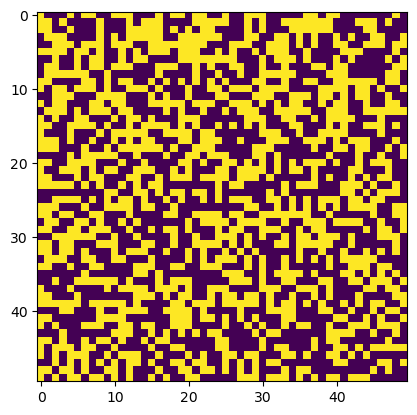

In [3]:
boxlen = 50 # box length 
spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen)) # create 2d array of box len of -1's and 1's
plt.imshow(spins);

### 2. Calculate the energy

The energy of a spin interacting with neighbours is given by: 

$$ E = - \Sigma_{i,j} \mathcal{J} s_i s_j - \Sigma_{i} B m s_i $$

where $i$ or $j$ indexes a lattice site, the spins $s_i$ and $s_j$ take on values of 1 or -1, m = 1/2, $\mathcal{J}$ is the quantum mechanical exchange coupling between spins, and $B$ is strength of an external magnetic field. In this notebook we will characterise the system in terms of the ratios $\mathcal{J} / k_B T$ and $ mB/k_B T$, which will be 0.0 and 0.5 respectively.

Therefore the difference in energy between two spin pairs is given by:
$$ \Delta E = E_2 - E_1 = - \Sigma_{i2,j2} \mathcal{J} s_{i2} s_{j2} + \Sigma_{i1,j1} \mathcal{J} s_{i1} s_{j1} $$

In [50]:
B_over_kT = 0.0 # set values
J_over_kT = 0.5
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1)) # sum over all neighbouring spins
etot = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))        # find total spins
print(f"Starting energy is {etot} KbT " )                                     # print energy

Starting energy is 24.0 KbT 


### 3. Write the swap function



In [51]:
def update_swap(i1,j1,i2,j2):
    """
    Update move for the Ising model
    
    Assumes that the 2D array spins is defined externally
    and changes this if the Metropolis criterion is met.
    
    Inputs:
    i, j  Location of spins to swap
    
    Output:
    de    Change of energy
    """
    i1m1 = (i1-1)%boxlen  # implement periodic boundaries 
    i1p1 = (i1+1)%boxlen
    j1m1 = (j1-1)%boxlen
    j1p1 = (j1+1)%boxlen
    sum_neigh_spins1 = spins[i1m1,j1] + spins[i1p1,j1] + spins[i1,j1m1] + spins[i1,j1p1] # sum all neighbouring spins
    i2m1 = (i2-1)%boxlen  # same for 2nd location
    i2p1 = (i2+1)%boxlen
    j2m1 = (j2-1)%boxlen
    j2p1 = (j2+1)%boxlen
    sum_neigh_spins2 = spins[i2m1,j2] + spins[i2p1,j2] + spins[i2,j2m1] + spins[i2,j2p1]   
    diff_spins = sum_neigh_spins1 - sum_neigh_spins2 # find difference 
    # The change in energy ...
    de = J_over_kT*(diff_spins)
    p = np.exp(-de)
    if de<0 or rng.random()<p:
        spins[i1, j1], spins[i2, j2] = -1 * spins[i1,j1], -1 * spins[i2, j2] # swap spins
    else:
        de = 0.0
    return de

### 4. Run the simulation

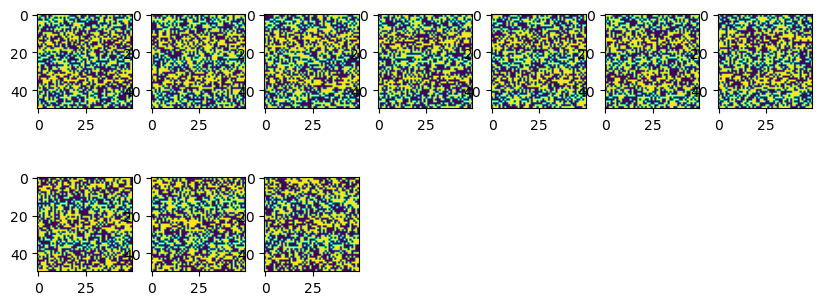

In [52]:
Nsteps = 50000
etot = np.zeros(Nsteps+1) # array for storing energy 
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins)) # initial energy
figIsing = plt.figure(figsize=(10,6))  # create figure
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(boxlen), rng.integers(boxlen)
    this_i2, this_j2 = rng.integers(boxlen), rng.integers(boxlen)
    de = update_swap(this_i1,this_j1,this_i2,this_j2)  #use swap function
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+ np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))   # update energy each for each timestep
    if i%5000==0: # plot every 3000th interval
        ax = figIsing.add_subplot(3,7,index)
        ax.imshow(spins, interpolation = None) 
        index +=1      # we wont add any labels as this normally causes text to overlap graphs

### 5. Show total energy

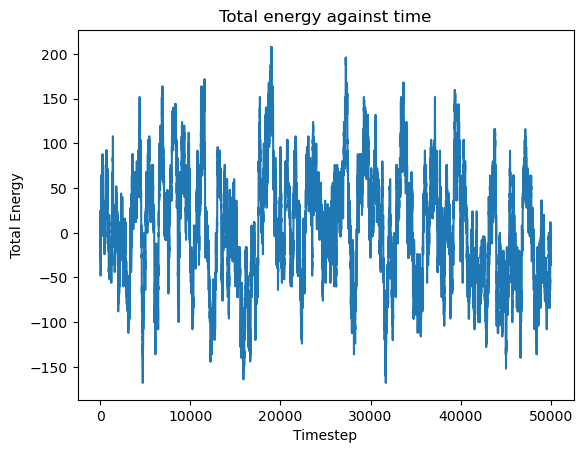

In [53]:
plt.plot(etot)
plt.xlabel('Timestep')
plt.ylabel('Total Energy')
plt.title('Total energy against time');

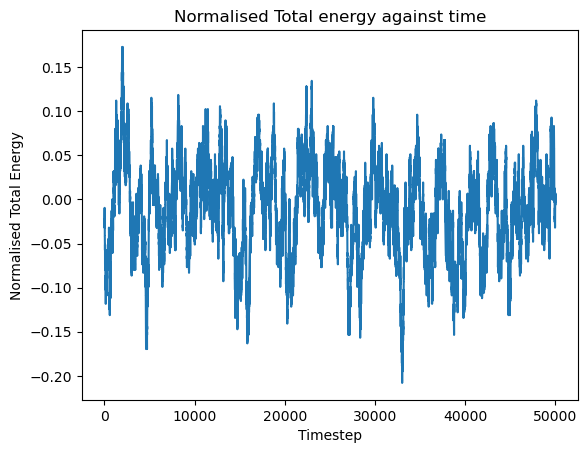

In [58]:
plt.plot(etot / (boxlen * boxlen * J_over_kT ))
plt.xlabel('Timestep')
plt.ylabel('Normalised Total Energy')
plt.title('Normalised Total energy against time');

### 6. Making our J/kBT = 0.2

Here we will repeat our simulation with the same parameters, except we will make our J/kBT = 0.2. 

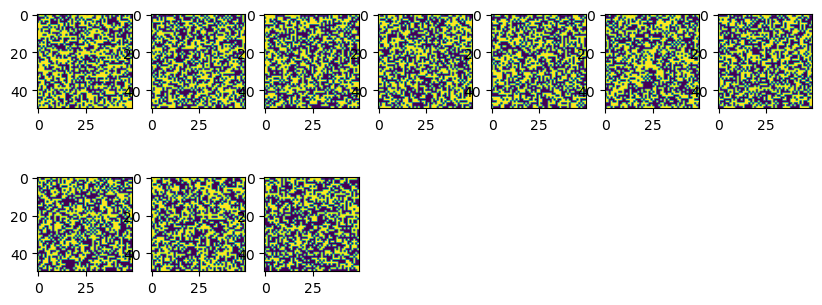

In [56]:
J_over_kT = 0.2
# Repeat simulation
Nsteps = 50000
etot = np.zeros(Nsteps+1) # array for storing energy 
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                   np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins)) # initial energy
figIsing = plt.figure(figsize=(10,6))  # create figure
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(boxlen), rng.integers(boxlen)
    this_i2, this_j2 = rng.integers(boxlen), rng.integers(boxlen)
    de = update_swap(this_i1,this_j1,this_i2,this_j2)  #use swap function
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+ np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))   # update energy each for each timestep
    if i%5000==0: # plot every 3000th interval
        ax = figIsing.add_subplot(3,7,index)
        ax.imshow(spins, interpolation = None) 
        index +=1      # we wont add any labels as this normally causes text to overlap graphs

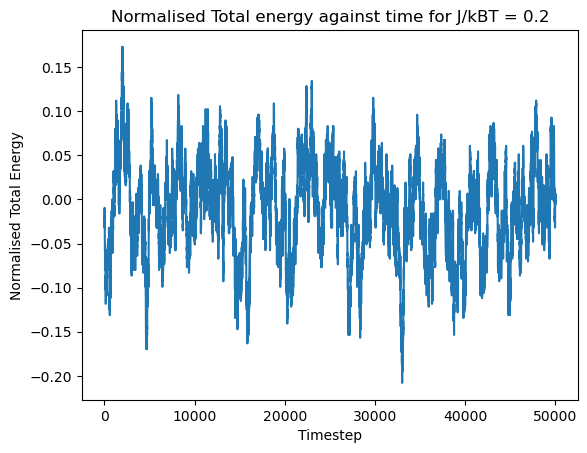

In [60]:
plt.plot(etot / (boxlen * boxlen * J_over_kT ))
plt.xlabel('Timestep')
plt.ylabel('Normalised Total Energy')
plt.title('Normalised Total energy against time for J/kBT = 0.2');

## Conclusion


Changing our J/kBT value made an unnoticable difference the graphs, both in shape and magnitide. This suggests that perhaps the change in our J/kBT value was too small to be recognised or the constant doesn't make a large difference to our model in the first place, meaning that it could potentially be ignored if a an external magentic field exists which would contribute to almost all of the Energy anyway. 